<a href="https://colab.research.google.com/github/GiteshKharga/covid_analysis/blob/main/main(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'
df = pd.read_csv(url)

In [3]:
# Display data types
print(df.dtypes)

# Display first few rows
print(df.head())

# Display shape of the DataFrame
print("Shape:", df.shape)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [4]:
print(df.describe())
print(df.dtypes.value_counts)
print (" unique location:", df['location'].nunique())
print("continent value counts:\n", df['continent'].value_counts())
print("total cases:",df['total_cases'].max())
print("mean total cases:", df['total_cases'].mean())
print("quartiles of total deaths:",df['total_deaths'].quantile([0.25,0.5,0.75]))
print("max hdi row:\n",df.loc[df['human_development_index'].idxmax()])
print("min gdp row:\n",df.loc[df['gdp_per_capita'].idxmin()])


        total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  5.375800e+04   56465.000000        55652.000000  4.436800e+04   
mean   1.677974e+05    1953.576941         1920.431953  6.858639e+03   
std    1.693038e+06   18269.650340        17777.391785  5.578081e+04   
min    1.000000e+00   -8261.000000         -552.000000  1.000000e+00   
25%    1.800000e+02       0.000000            0.857000  1.300000e+01   
50%    2.070000e+03      14.000000           19.429000  8.400000e+01   
75%    2.235675e+04     235.000000          245.286000  7.270000e+02   
max    5.515465e+07  646281.000000       584981.857000  1.328537e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  56465.000000         55652.000000             53471.000000   
mean      47.054317            46.835439              3139.099982   
std      390.853776           378.272794              6183.455260   
min    -1918.000000          -232.143000                 0.001000   
25%   

In [5]:
columns_to_keep = ['continent','location', 'date', 'total_cases', 'total_deaths', 'human_development_index', 'gdp_per_capita']
df= df[columns_to_keep]
df=df.drop_duplicates()
print(df.isnull().sum())
df=df.dropna(subset=['continent'])
df=df.fillna(0)


continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
human_development_index     8147
gdp_per_capita              7027
dtype: int64


In [6]:
print(df.isnull().sum())

continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
human_development_index    0
gdp_per_capita             0
dtype: int64


In [9]:
df['date']=pd.to_datetime(df['date'],format='%d/%m/%y')
df['month']=df['date'].dt.month
print(df[['date','month']].head())


        date  month
0 2019-12-31     12
1 2020-01-01      1
2 2020-01-02      1
3 2020-01-03      1
4 2020-01-04      1


In [11]:
df_groupby=df.groupby('continent').max().reset_index()
df_groupby['total_death_to_total_cases']=(df_groupby['total_deaths']/ df_groupby['total_cases'])
print(df_groupby[['continent','total_death_to_total_cases','total_deaths','total_cases']])

       continent  total_death_to_total_cases  total_deaths  total_cases
0         Africa                    0.027004       20314.0     752269.0
1           Asia                    0.014708      130519.0    8874290.0
2         Europe                    0.026188       52147.0    1991233.0
3  North America                    0.022062      247220.0   11205486.0
4        Oceania                    0.032685         907.0      27750.0
5  South America                    0.028251      166014.0    5876464.0


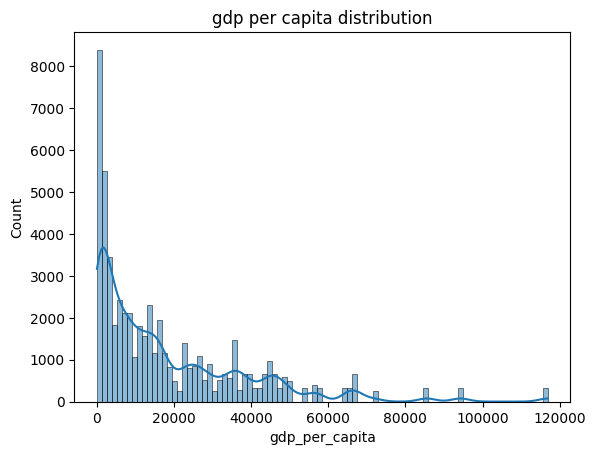

In [12]:
sns.histplot(df['gdp_per_capita'],kde=True)
plt.title("gdp per capita distribution")
plt.show()

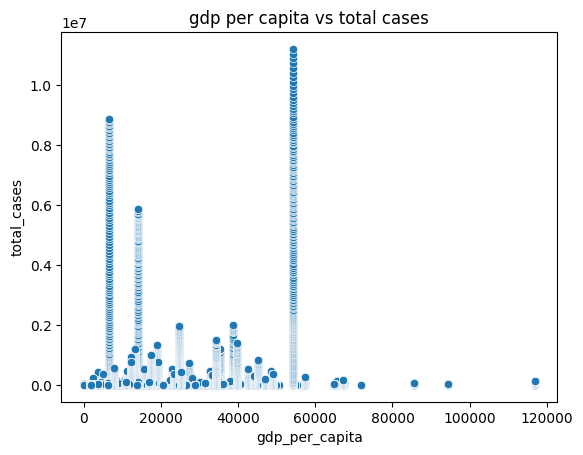

In [13]:
sns.scatterplot(x='gdp_per_capita',y='total_cases',data=df)
plt.title("gdp per capita vs total cases")
plt.show()

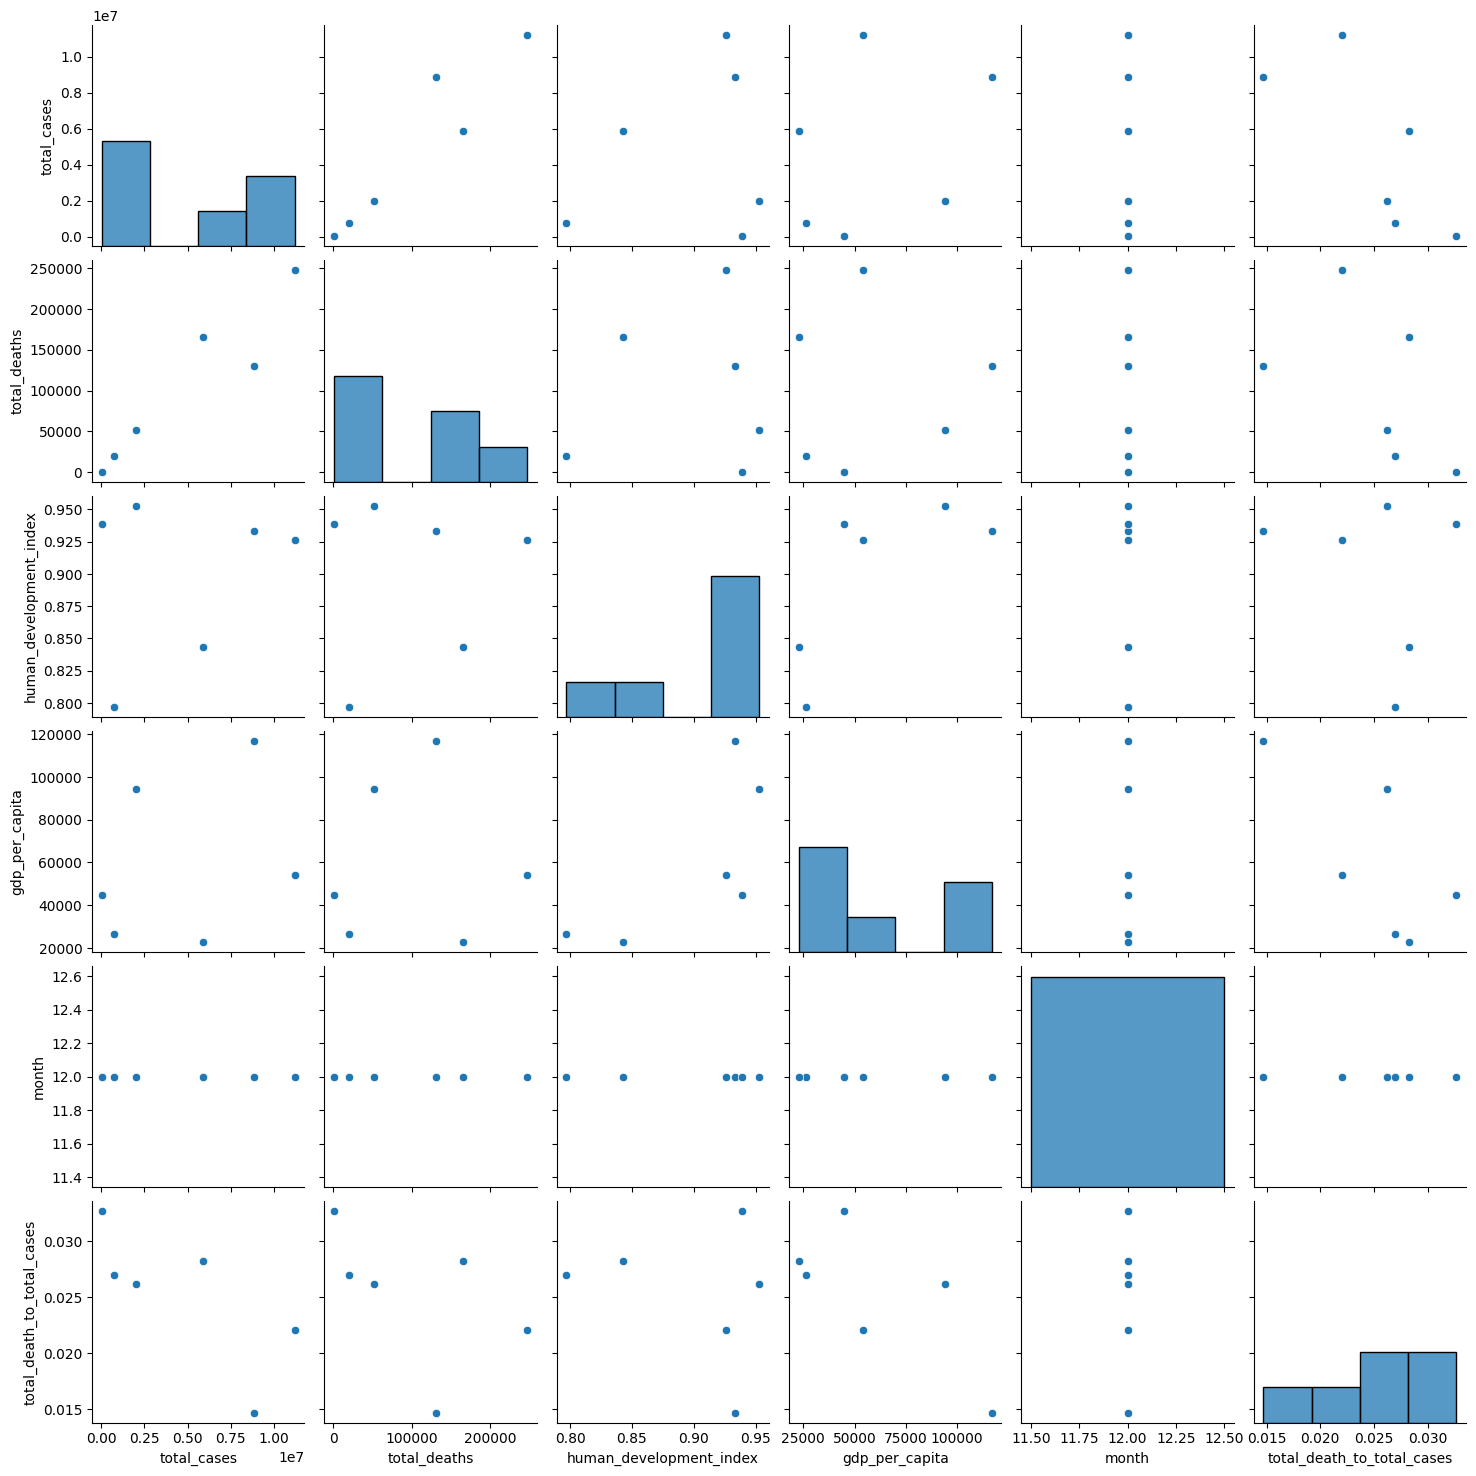

In [14]:
sns.pairplot(df_groupby)
plt.show()

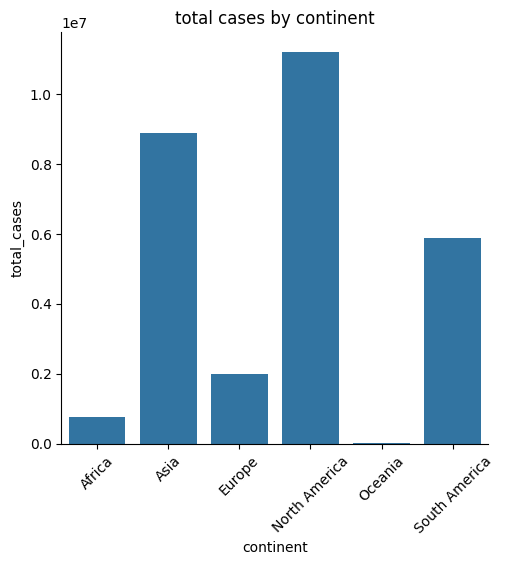

In [16]:
sns.catplot(x='continent',y='total_cases',kind='bar',data=df_groupby)
plt.title("total cases by continent")
plt.xticks(rotation=45)
plt.show()

In [17]:
df_groupby.to_csv("covid_grouped_data.csv", index=False)
